<a href="https://colab.research.google.com/github/SahilKumar777/ML-AI-Projects/blob/main/Logistic_Regression/Telco_Customer_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# **Project Title**: **Telecom Customer Churn Classification**
---
### ---> **Sahil Kumar 777**

       
* Objective :- Predict behavior of customers using classification methods to retain customers
* Algo Used :- Logistic Regression, Random forest, XGBoost


## 1. Load and Explore Dataset
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Telco Customer Churn Classification/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset details

In [ ]:
print("Number of rows : ",df.shape[0])
print("Number of Features : ",df.shape[1])

Number of rows :  7043
Number of Features :  21


In [ ]:
print("Numerical Columns : \n",df.columns[df.dtypes=='int'])
print("Continuous Columns : \n",df.columns[df.dtypes=='float'])
print("Categorical Columns : \n",df.columns[df.dtypes=='object'])

Numerical Columns : 
 Index(['SeniorCitizen', 'tenure'], dtype='object')
Continuous Columns : 
 Index(['MonthlyCharges'], dtype='object')
Categorical Columns : 
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Function for displaying percantage distribution of categorical data

def value_counts_percent (df,col) :
  df1=pd.DataFrame(df[col].value_counts())
  df1['Percentage'] = (df[col].value_counts()/df[col].value_counts().sum()*100).round(decimals=2).astype(str) + " %"
  return df1

In [ ]:
for col in df.columns :
  if df[col].nunique() < 10 :
    print(value_counts_percent(df,col))
    print('----'*10)

        count Percentage
gender                  
Male     3555    50.48 %
Female   3488    49.52 %
----------------------------------------
               count Percentage
SeniorCitizen                  
0               5901    83.79 %
1               1142    16.21 %
----------------------------------------
         count Percentage
Partner                  
No        3641     51.7 %
Yes       3402     48.3 %
----------------------------------------
            count Percentage
Dependents                  
No           4933    70.04 %
Yes          2110    29.96 %
----------------------------------------
              count Percentage
PhoneService                  
Yes            6361    90.32 %
No              682     9.68 %
----------------------------------------
                  count Percentage
MultipleLines                     
No                 3390    48.13 %
Yes                2971    42.18 %
No phone service    682     9.68 %
----------------------------------------
       

### Features Details identified
* customerID: Unique ID for each customer
* gender: Gender of the customer (Male,Female)
* SeniorCitizen: Whether the customer is a senior citizen (1, 0)
* Partner: Whether the customer has a partner (Yes,No)
* Dependents: Whether the customer has dependents (Yes,No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has phone service (Yes,No)
* MultipleLines: Whether the customer has multiple lines (Yes,No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes,No, No internet service)
* OnlineBackup: Whether the customer has online backup (Yes,No, No internet service)
* DeviceProtection: Whether the customer has device protection (Yes,No, No internet service)
* TechSupport: Whether the customer has tech support (Yes,No, No internet service)
* StreamingTV: Whether the customer has streaming TV (Yes,No, No internet service)
* StreamingMovies: Whether the customer has streaming movies (Yes,No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing (Yes,No)
* PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card)
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned (Yes,No)

## Dataset cleaning

In [ ]:
# Check Missing data percentage

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [ ]:
df.duplicated().sum()

0

### Ploting figures to get outliers

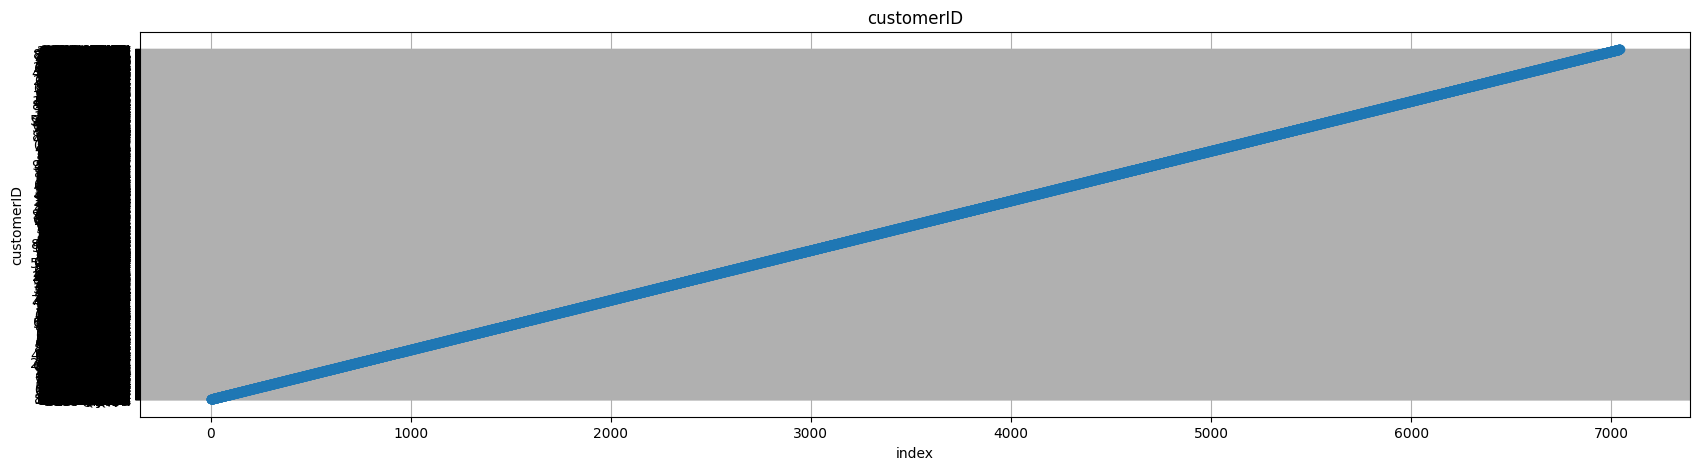

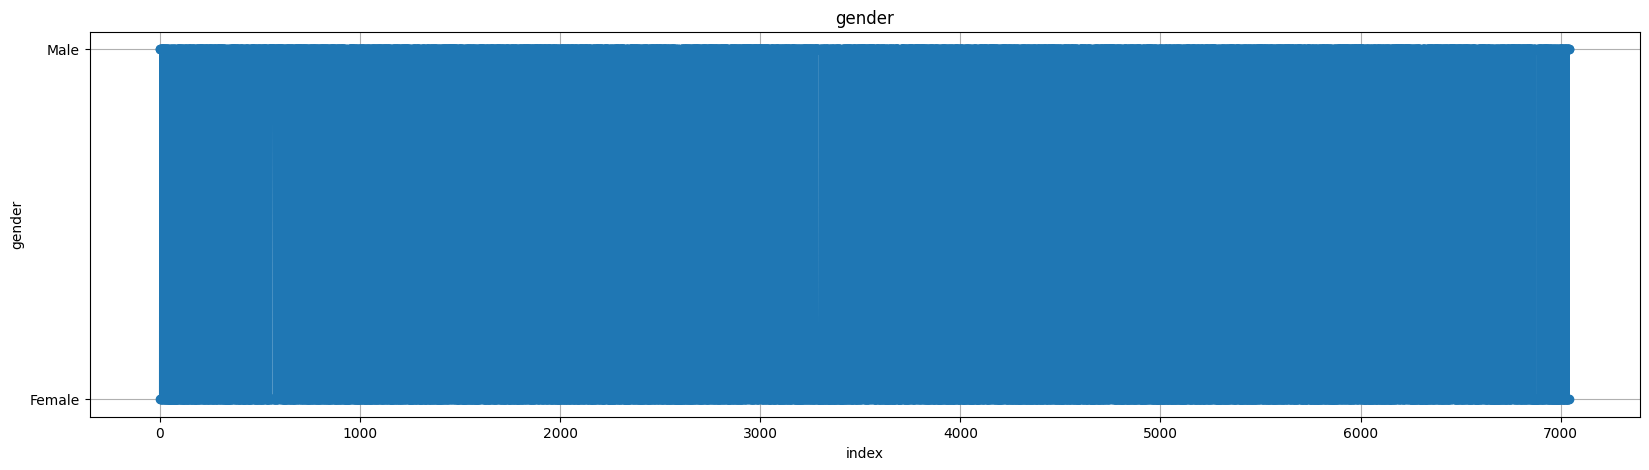

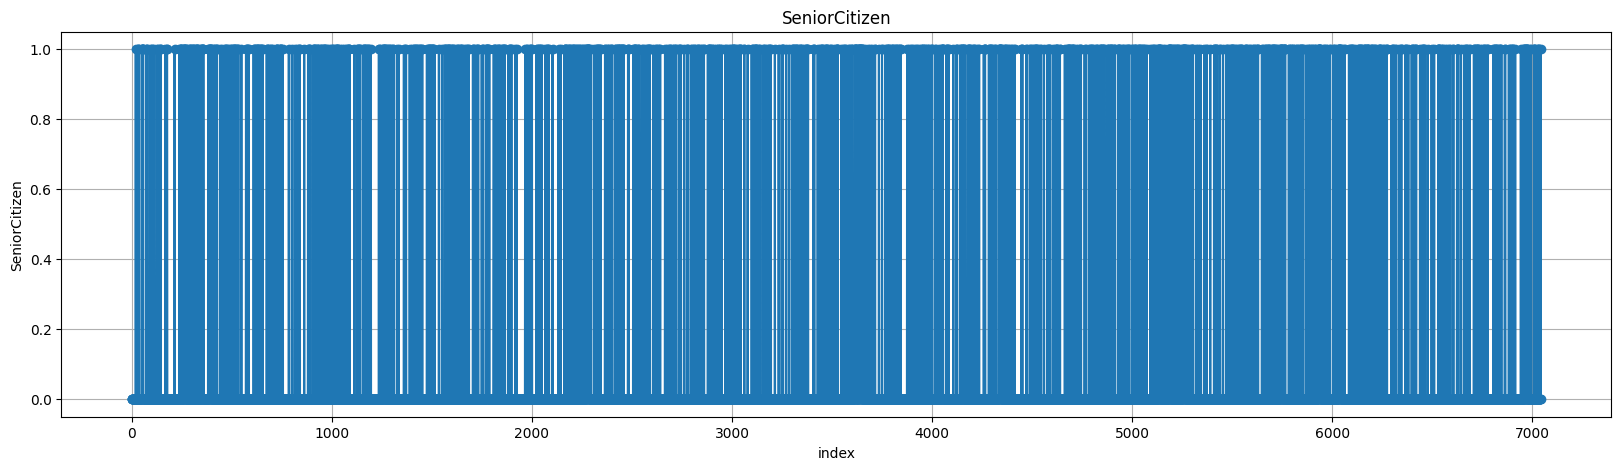

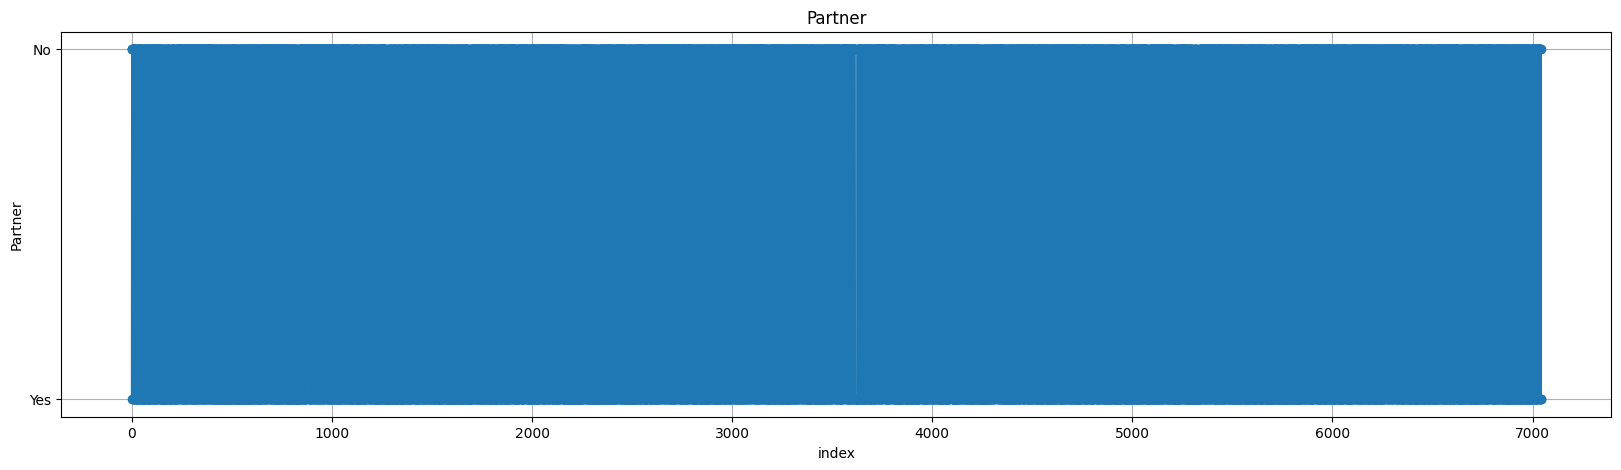

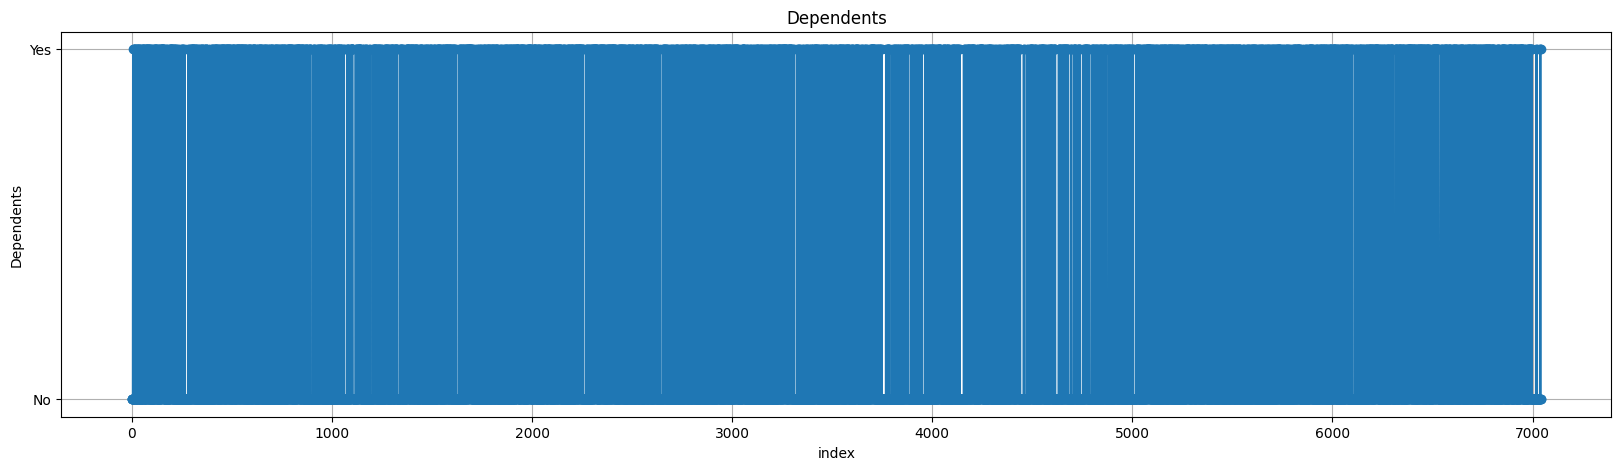

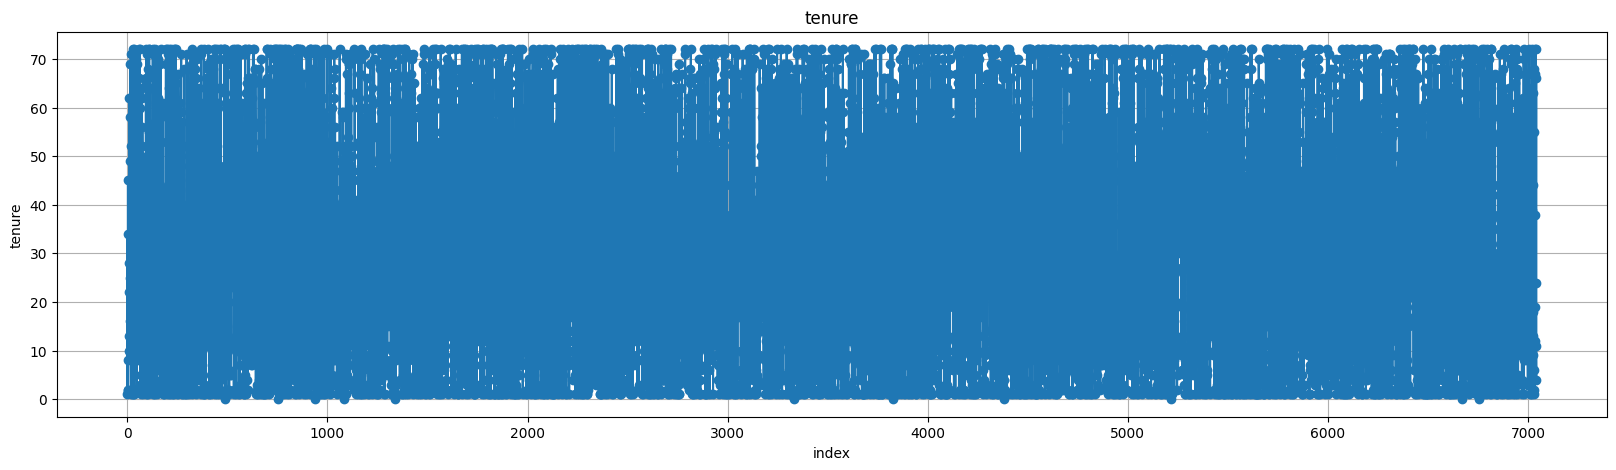

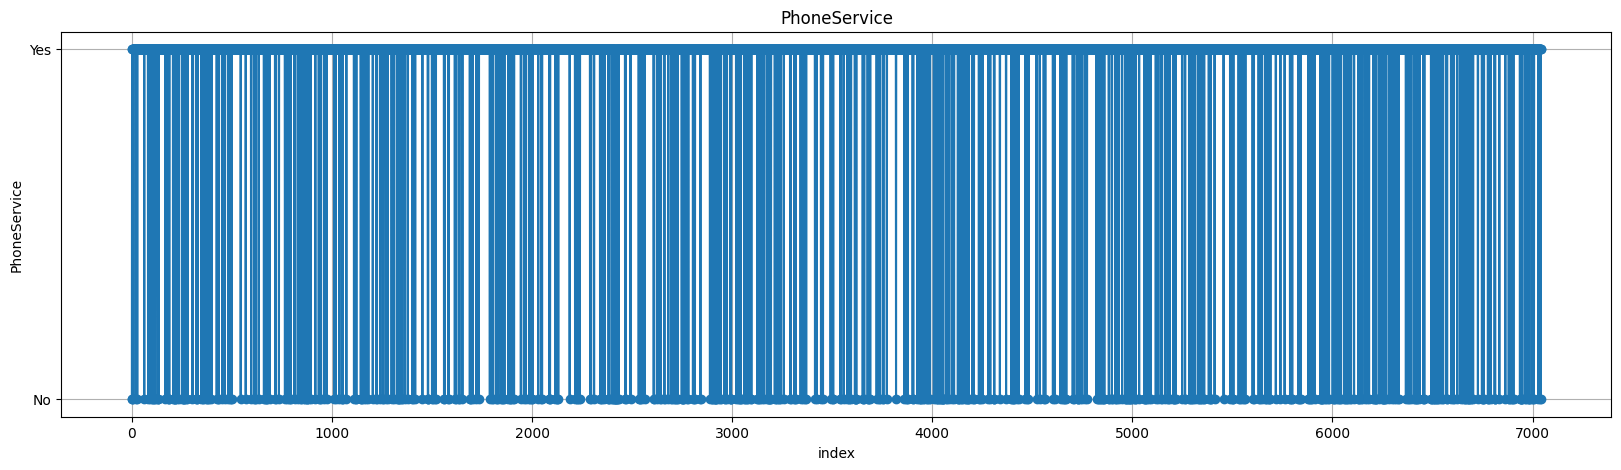

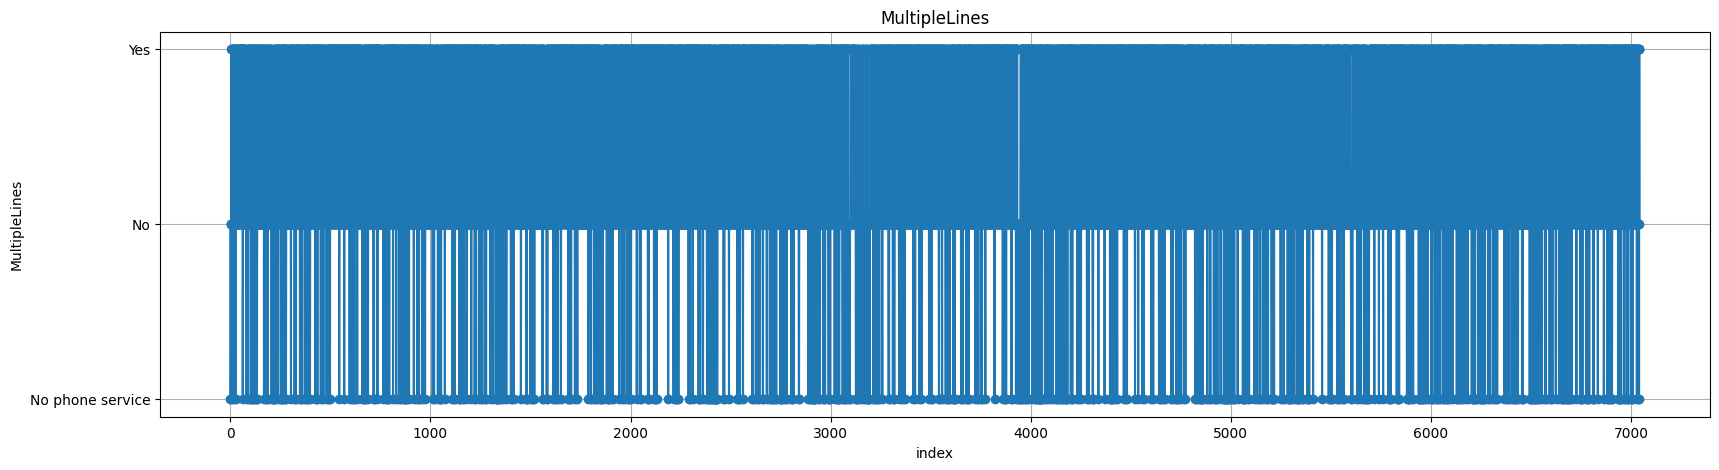

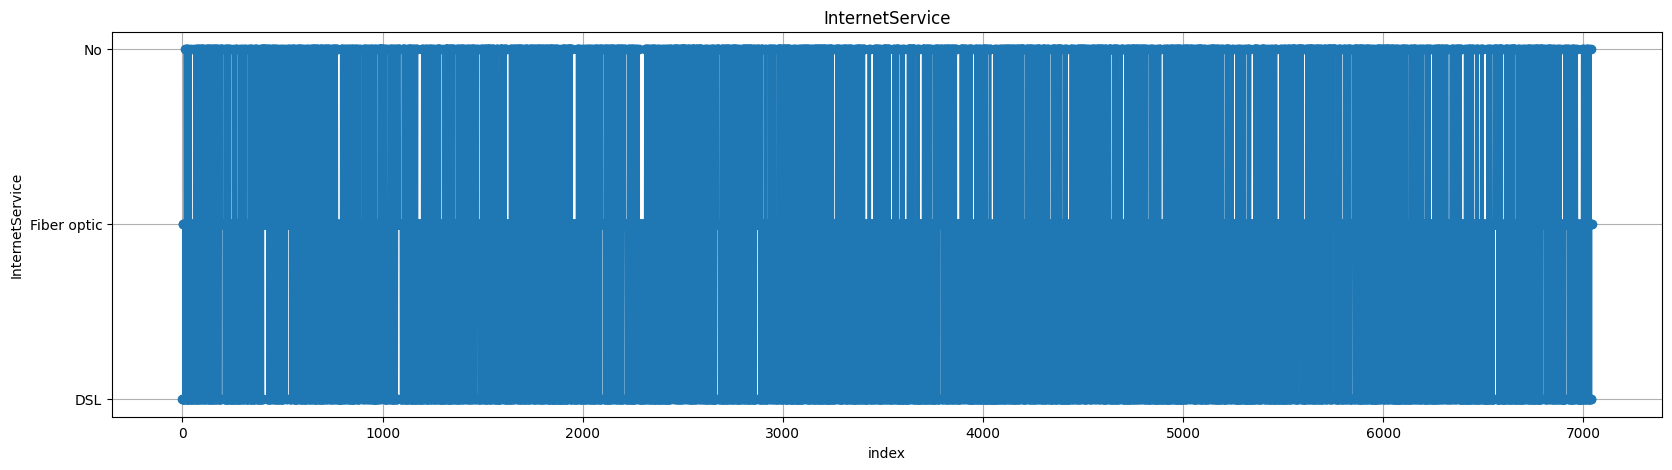

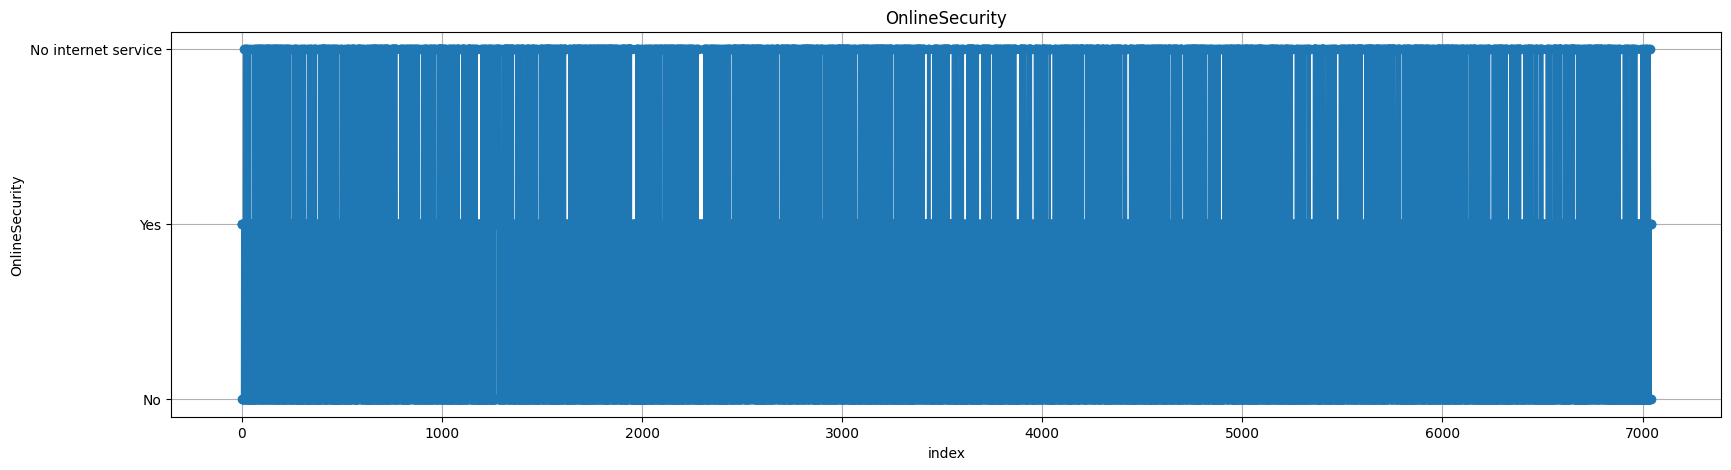

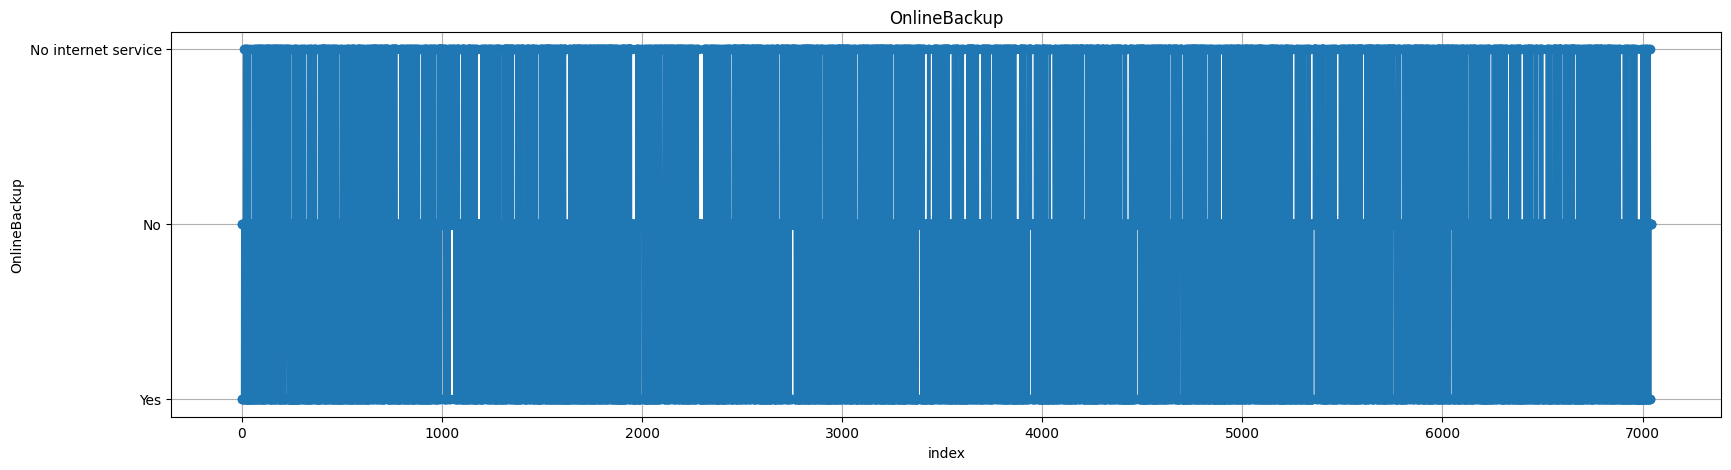

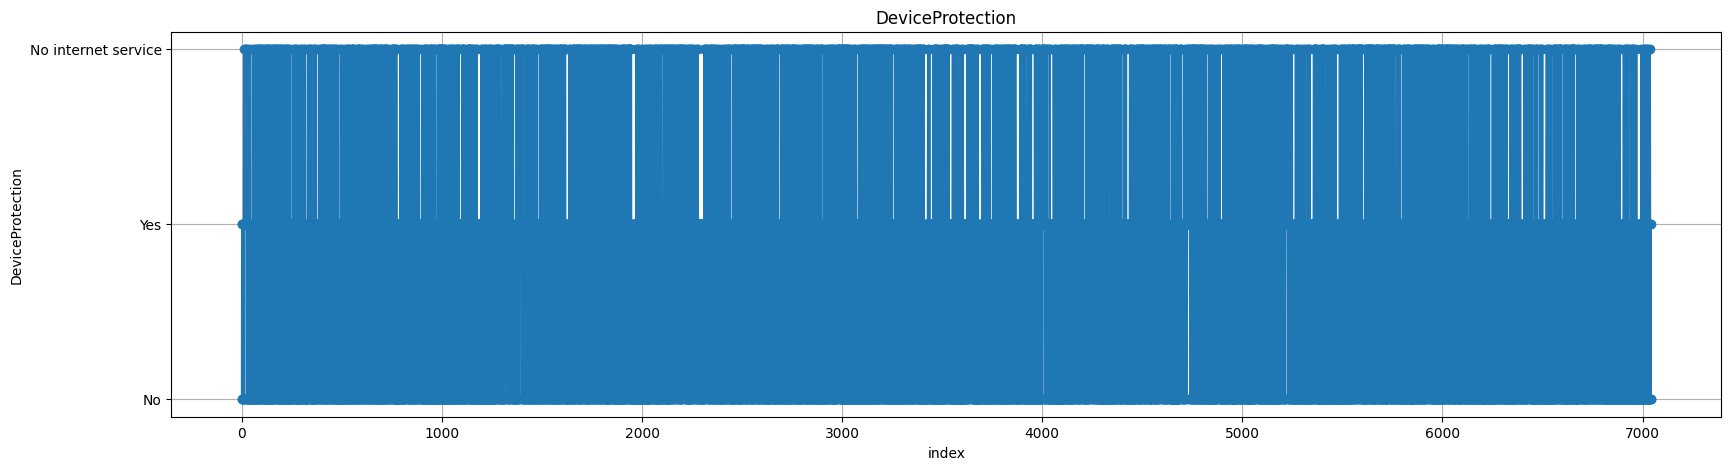

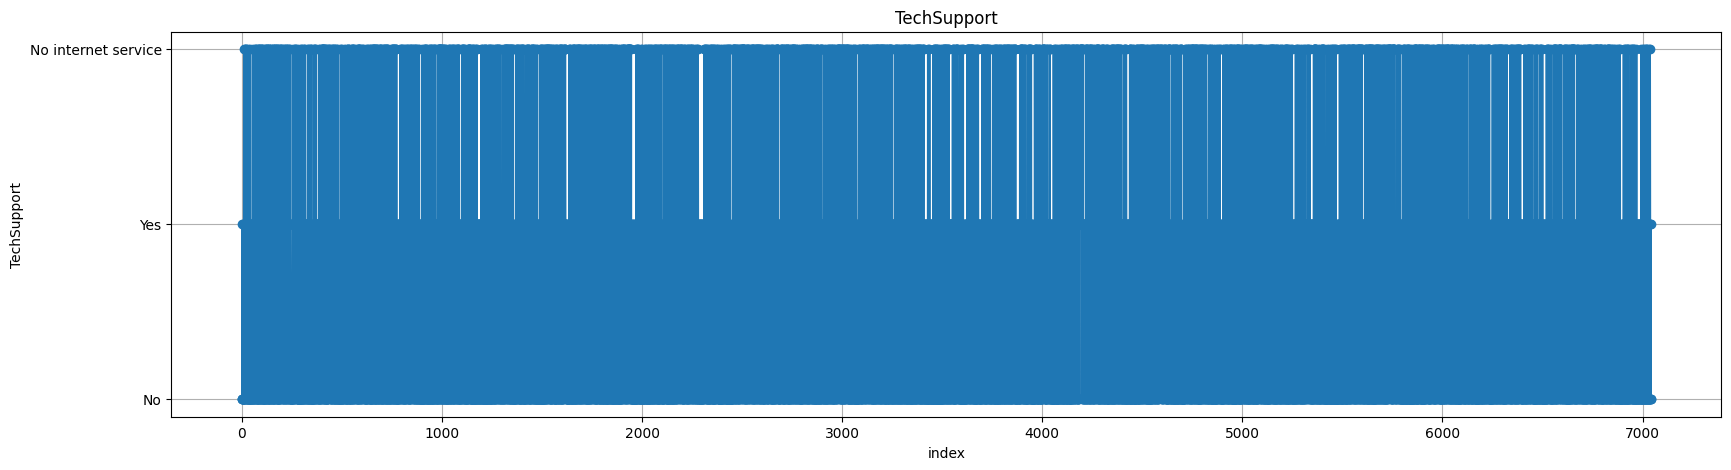

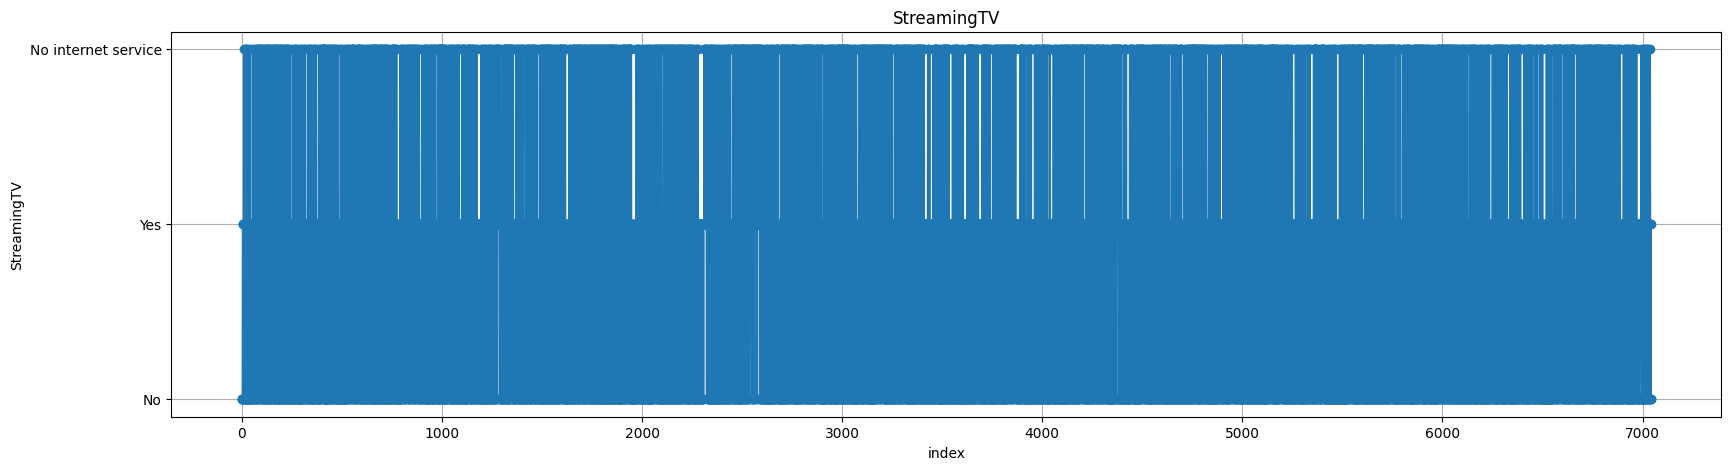

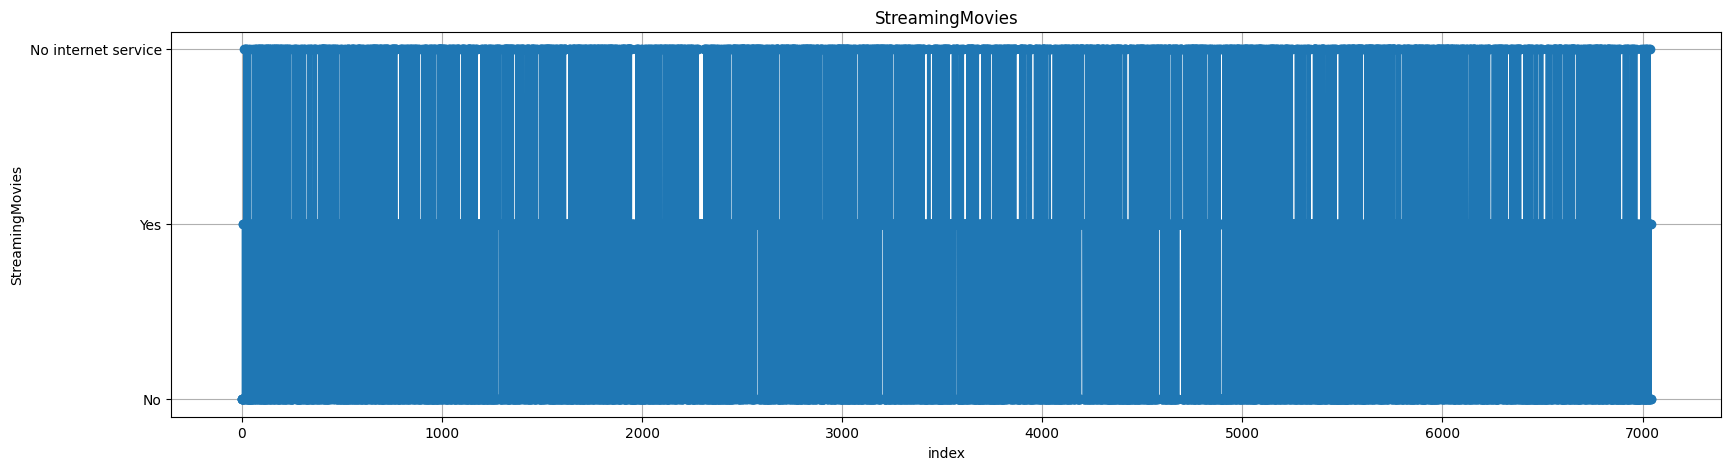

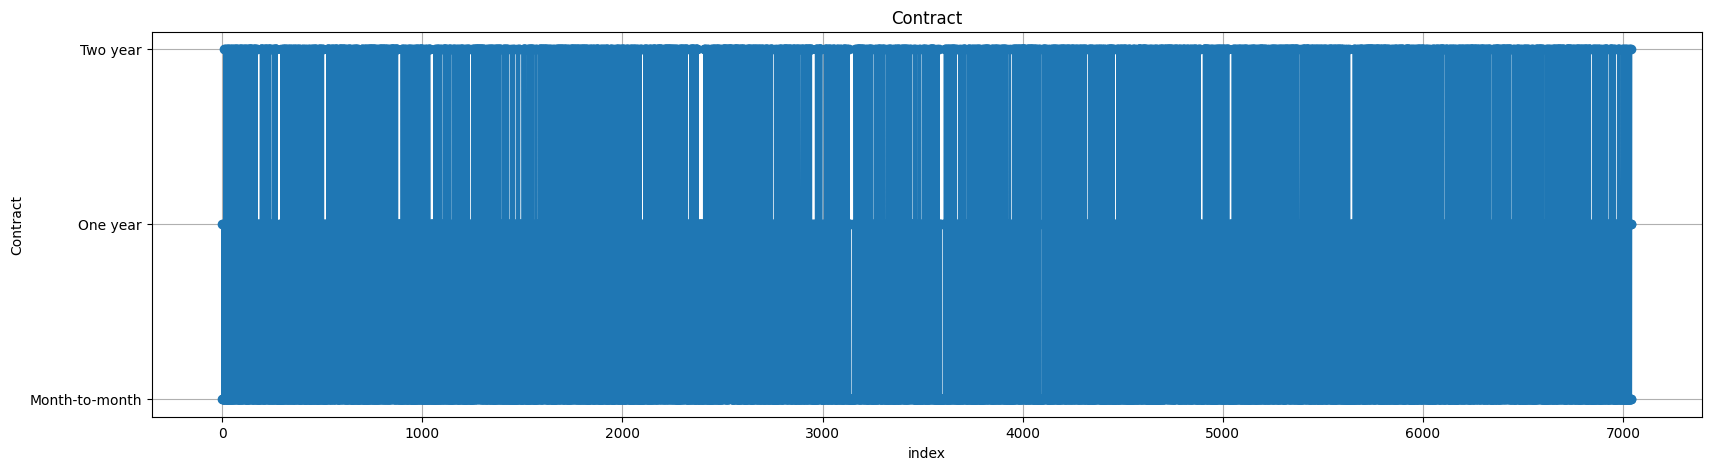

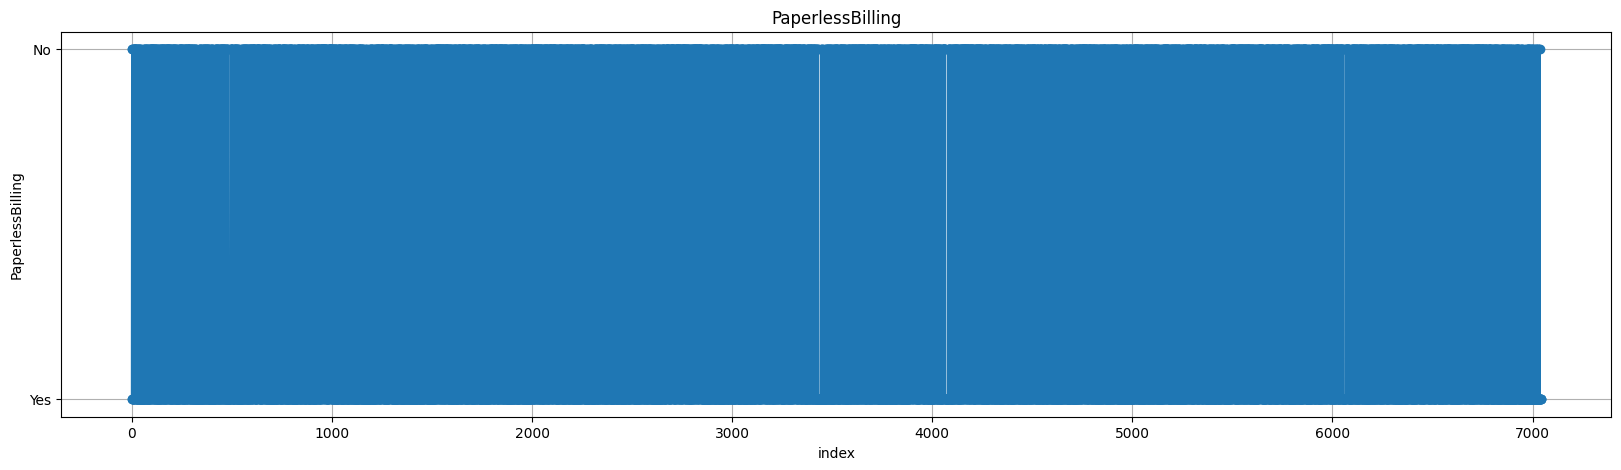

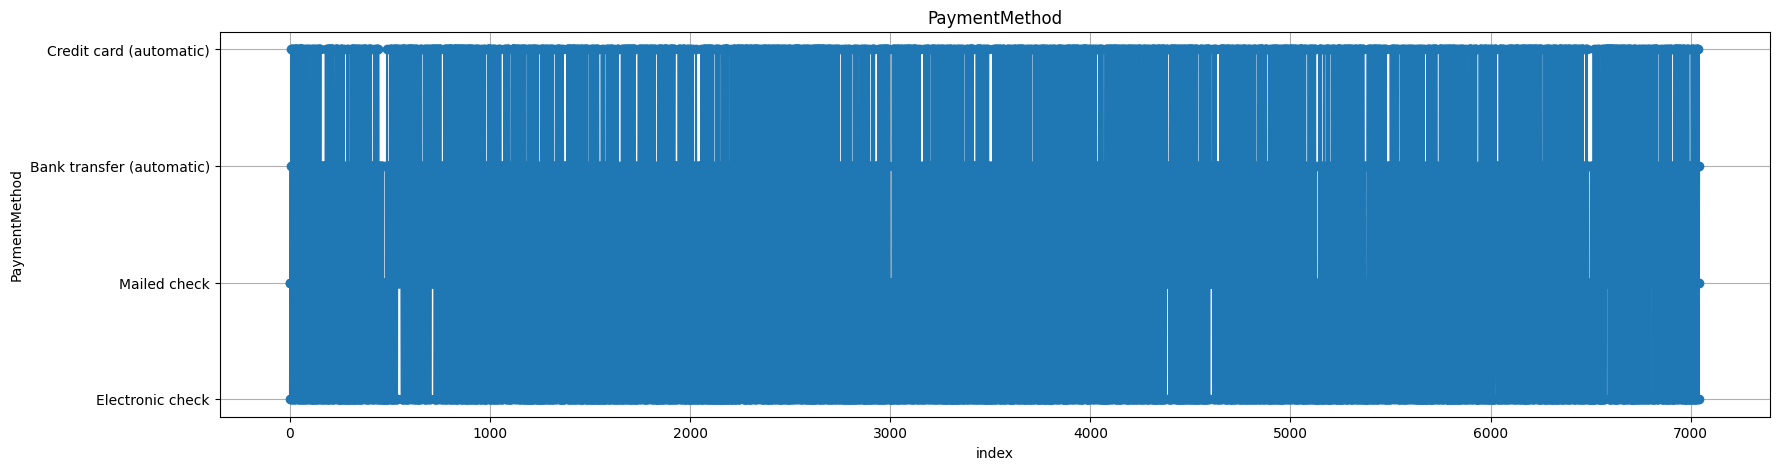

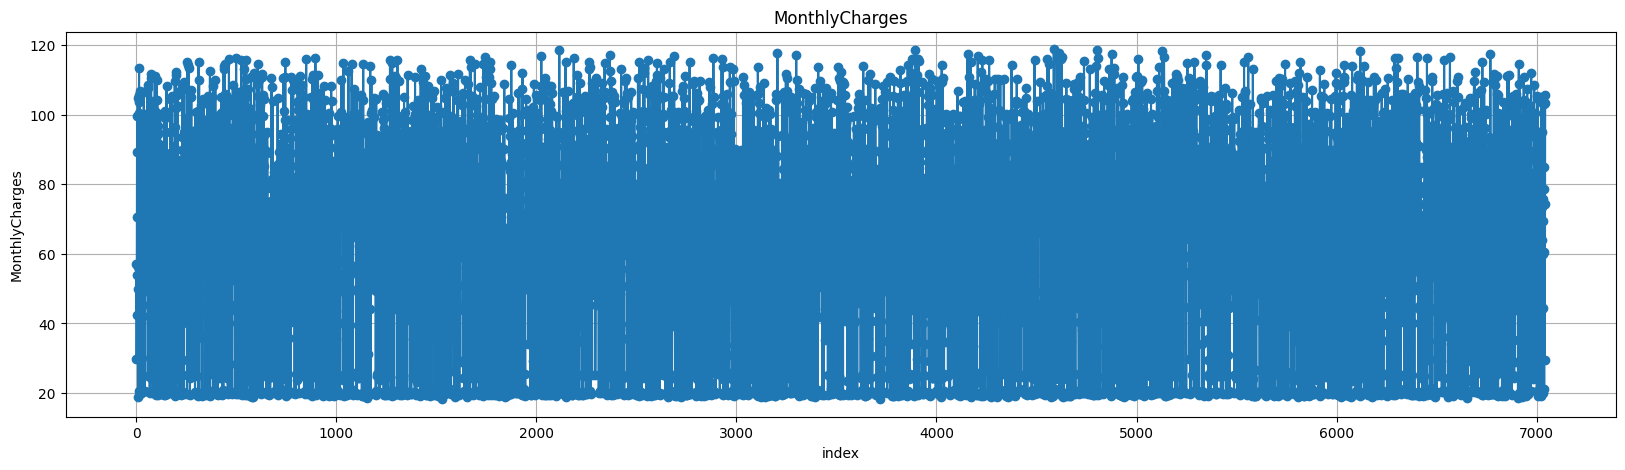

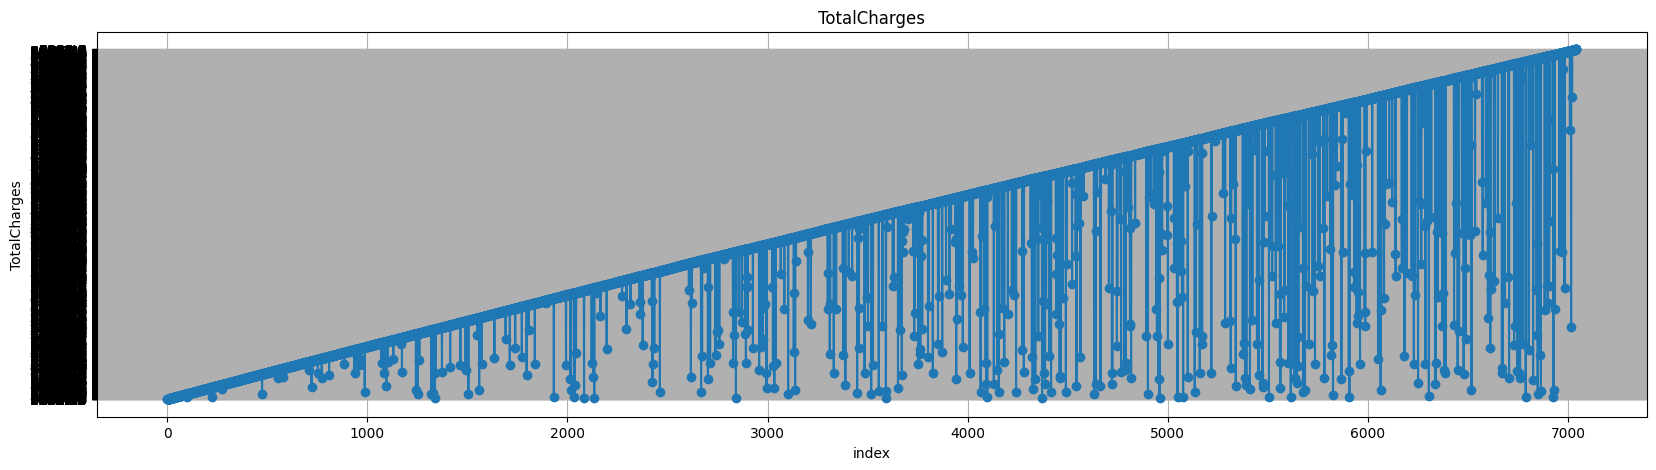

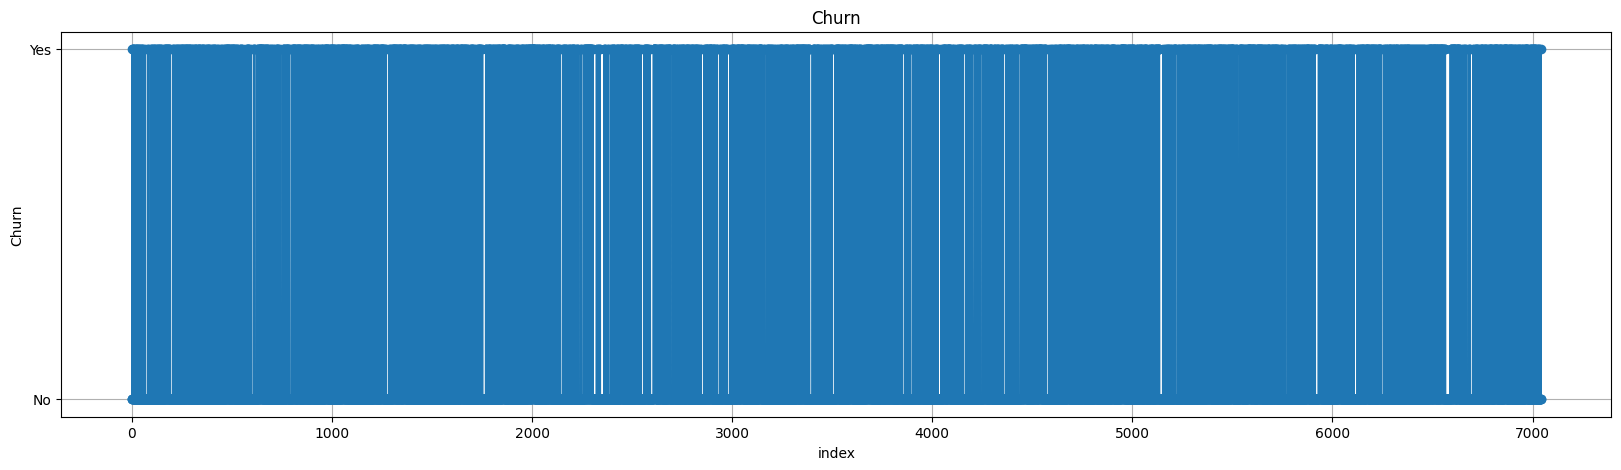

In [ ]:
# ploting values graph

for col in df.columns :
  plt.figure(figsize=(20, 5))
  plt.plot(df.index, df[col], marker='o', linestyle='-')
  plt.title(col)
  plt.xlabel('index')
  plt.ylabel(col)
  plt.grid(True)
  plt.show()

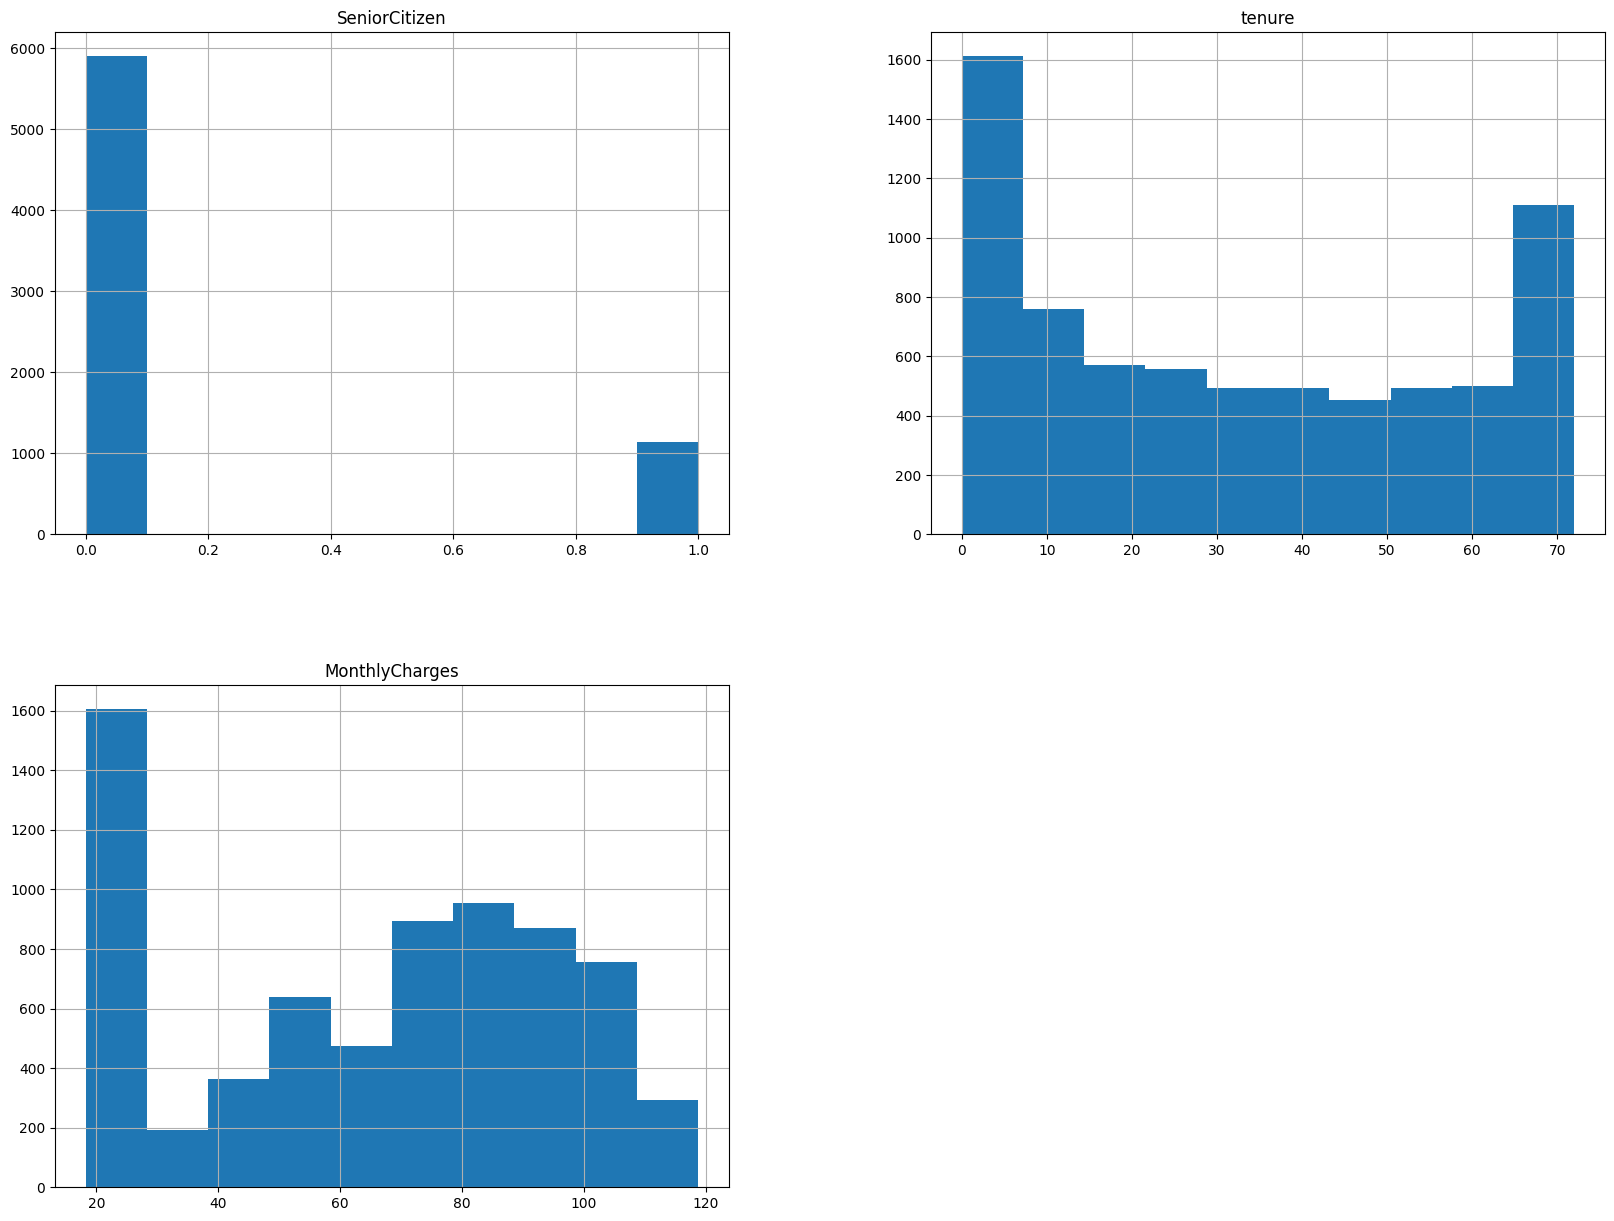

In [ ]:
# plotting histogram of all features

df.hist(figsize=(20,15))
plt.show()

<ipython-input-13-bc27d58fe168>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,1))


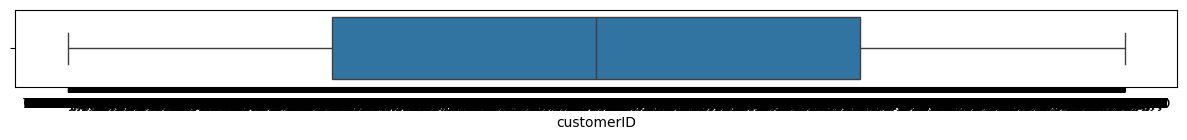

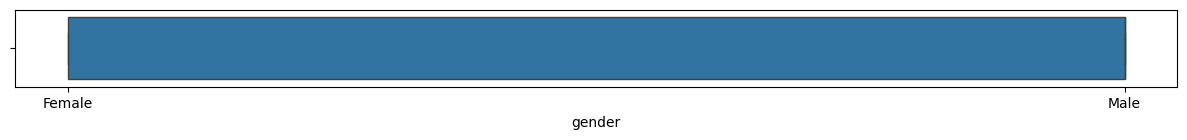

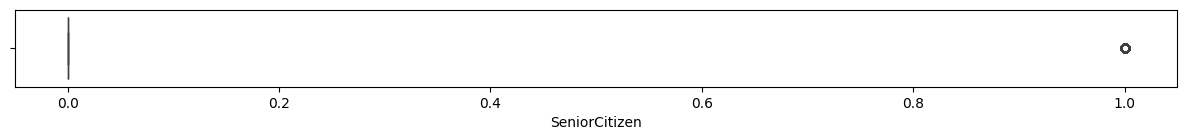

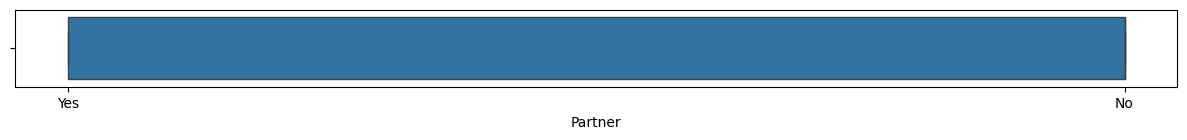

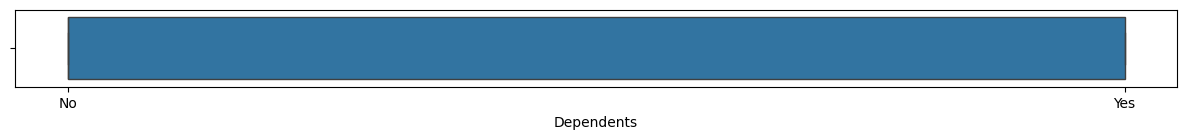

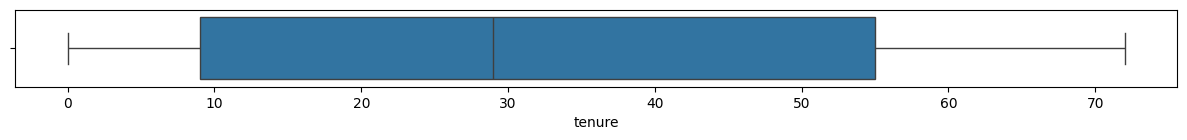

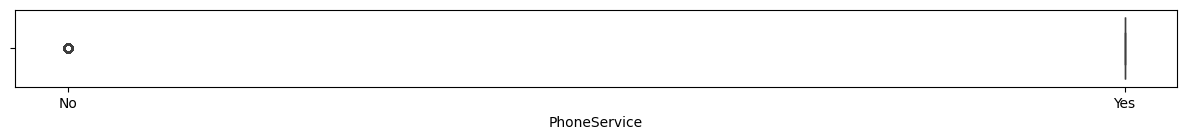

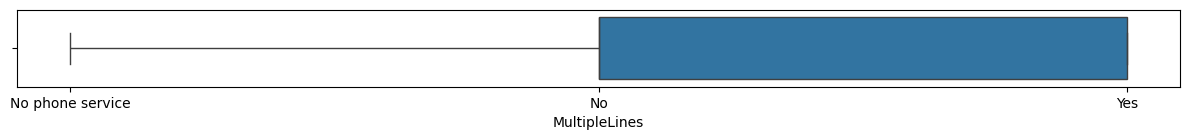

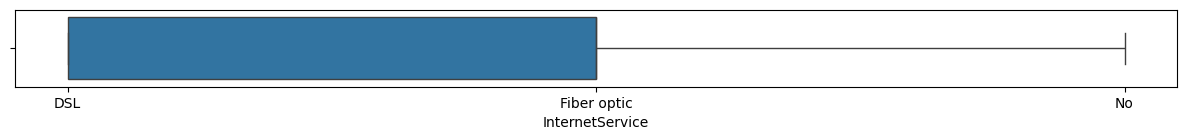

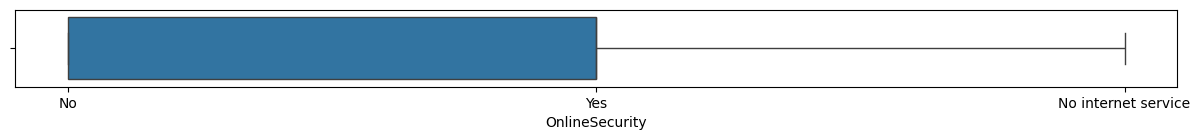

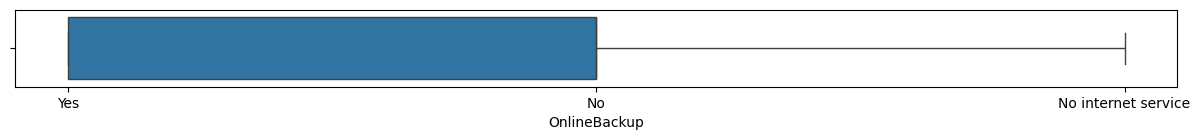

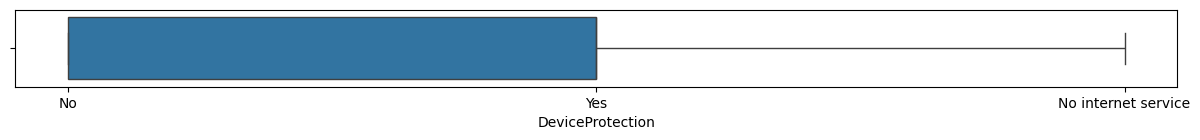

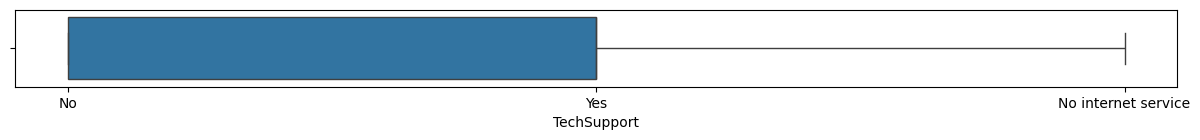

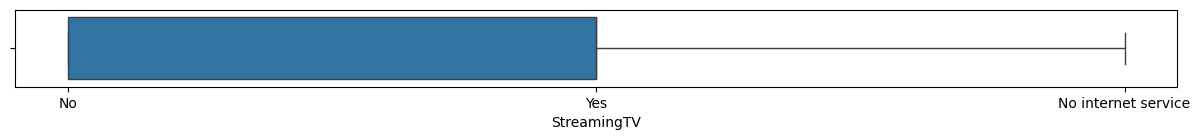

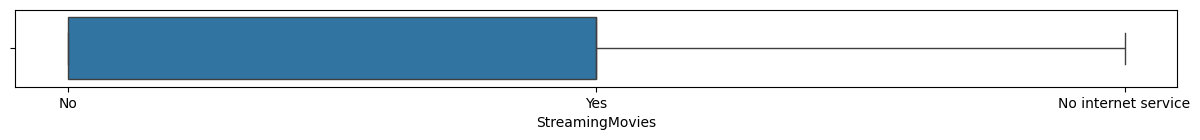

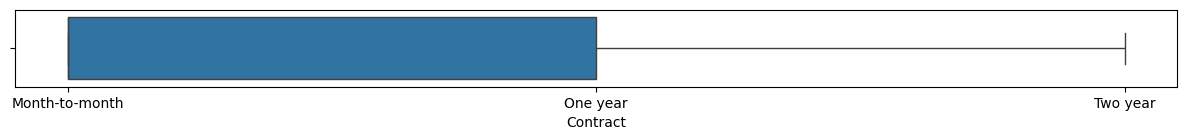

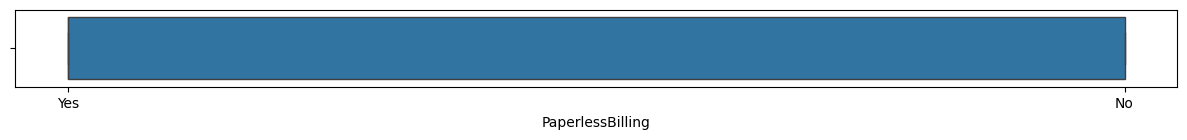

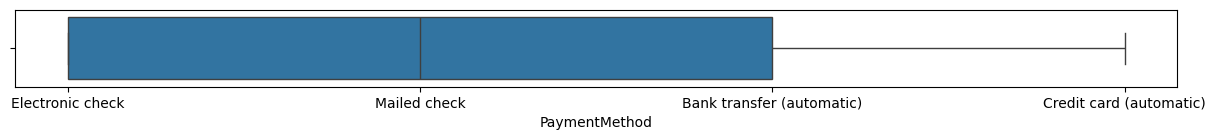

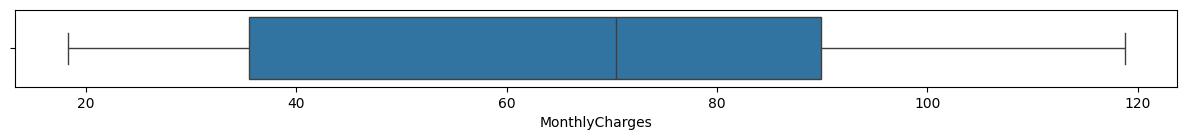

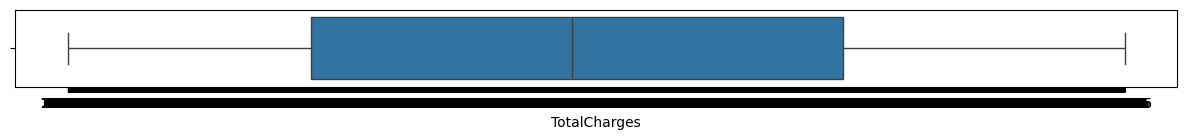

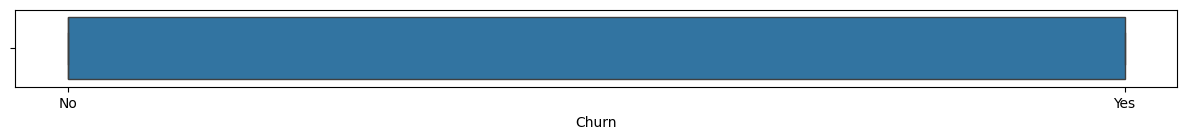

In [ ]:
# plotting boxplot for each feature

for column in df:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=column)

no outliers found

## Feature Engineering

In [4]:
df.gender=df.gender.map({'Male':1,'Female':0})

In [5]:
df.Partner=df.Partner.map({'Yes':1,'No':0})

In [6]:
df.Dependents=df.Dependents.map({'Yes':1,'No':0})

In [7]:
df.PhoneService=df.PhoneService.map({'Yes':1,'No':0})

In [8]:
df.MultipleLines=df.MultipleLines.map({'Yes':1,'No':0,'No phone service':-1})

In [9]:
df.InternetService=df.InternetService.map({'Fiber optic':1,'No':0,'DSL':-1})

In [10]:
df.OnlineSecurity=df.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':-1})

In [11]:
df.OnlineBackup=df.OnlineBackup.map({'Yes':1,'No':0,'No internet service':-1})

In [12]:
df.DeviceProtection=df.DeviceProtection.map({'Yes':1,'No':0,'No internet service':-1})

In [13]:
df.TechSupport=df.TechSupport.map({'Yes':1,'No':0,'No internet service':-1})

In [14]:
df.StreamingTV=df.StreamingTV.map({'Yes':1,'No':0,'No internet service':-1})

In [15]:
df.StreamingMovies=df.StreamingMovies.map({'Yes':1,'No':0,'No internet service':-1})

In [16]:
df.PaperlessBilling=df.PaperlessBilling.map({'Yes':1,'No':0})

In [17]:
df.Contract=df.Contract.map({'Month-to-month':1,'One year':2,'Two year':3})

In [18]:
df.PaymentMethod=df.PaymentMethod.map({'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credt card (automatic)':4})

In [21]:
df.Churn=df.Churn.map({'Yes':1,'No':0})

In [22]:
# Correlation
corr=df.select_dtypes("number").corr()
corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.009912,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,0.000126,-0.011754,-0.010873,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.202513,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,-0.131428,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.000631,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.124109,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.121616,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,0.139061,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.003959,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.291022,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.407817,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,0.003334,0.247398,0.011942
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.429273,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,-0.012699,0.490700,0.036310
InternetService,-0.009912,0.202513,0.000631,-0.121616,0.003959,0.407817,0.429273,1.000000,-0.088743,0.037256,0.045084,-0.082412,0.144937,0.139238,-0.173253,0.218455,-0.191335,0.530465,0.240810
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,-0.088743,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,-0.036826,0.635534,0.023309
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.037256,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,-0.085867,0.710477,0.074205


<Axes: >

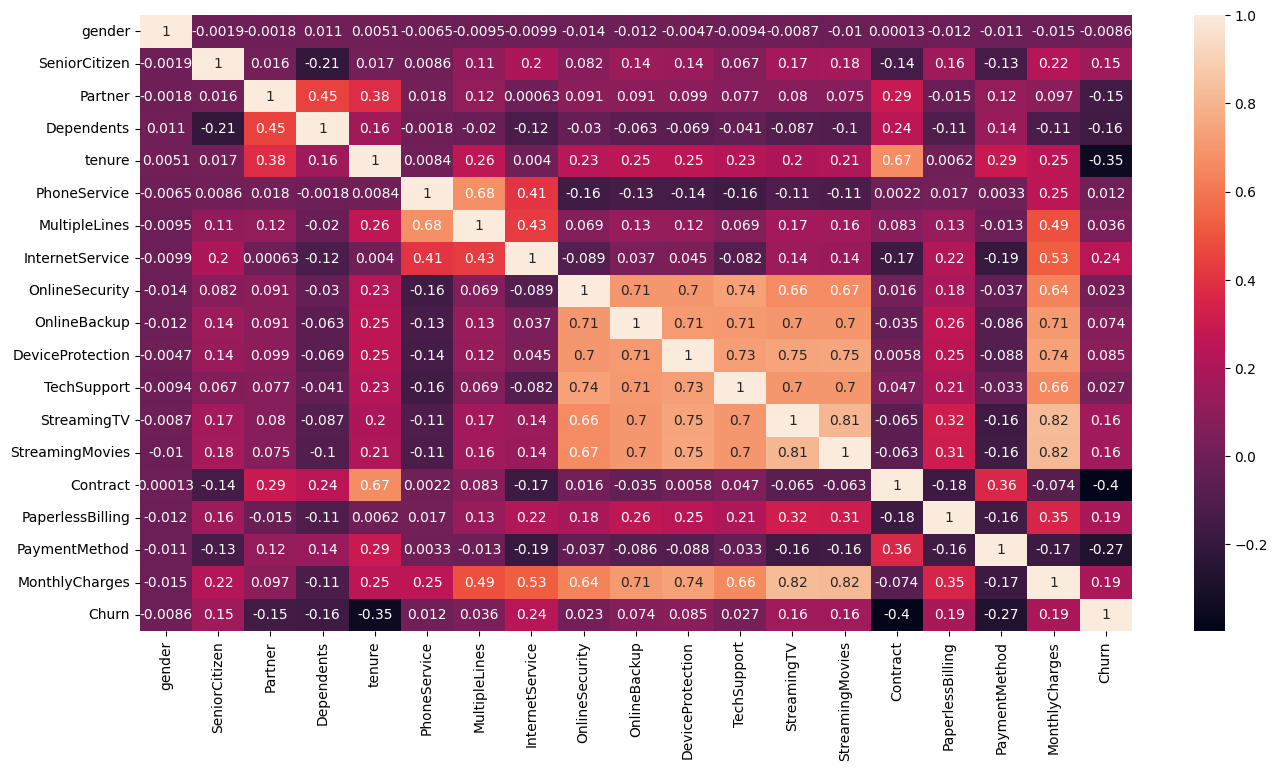

In [23]:
# Correlation visualisation (Heatmap)

plt.figure(figsize=(16,8))
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

## Machine Learning

In [24]:
x=df.drop(columns=['customerID','Churn'])
y=df.Churn

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)